# Potencial electrostático de una carga puntual frente a un plano conductor
En este notebook graficamos el potencial electrostático de una carga puntual frente a un plano conductor perfecto conectado a tierra, usando la solución obtenida por el método de imágenes. Para eso combinamos manipulación simbólica con SymPy (para calcular la distribución superficial de carga y el campo eléctrico) con NumPy y Matplotlib. Recuerden que cada celda a continuación debe ejecutarse en orden, apretando SHIFT+ENTER:

In [1]:
# El código en esta celda asegura que SymPy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

## Cálculo de la densidad superficial de carga y del campo eléctrico
Usemos SymPy para calcular el gradiente del potencial electrostático para una carga puntual con carga q, y la densidad de carga superficial. Comenzamos definiendo símbolos para el potencial, las coordenadas espaciales (x,y,z), y otras cantidades de interés.

In [2]:
# Definimos variables simbólicas reales phi (para el potencial), x,y,z para las coordenadas, y x',y',z' para las coordenadas primadas
phi,q,d  = symbols("phi q d", real=True)
x,y,z    = symbols("x y z",   real=True)

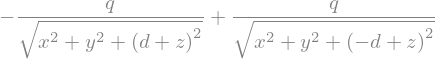

In [3]:
# Definimos el potencial y lo imprimimos
phi = q/(sqrt(x**2+y**2+(z-d)**2)) - q/(sqrt(x**2+y**2+(z+d)**2))
phi

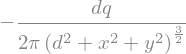

In [4]:
# La distribución superficial de carga es -1/(4*pi) por la derivada de phi respecto de z evaluada en el plano (z=0)
sigma = -(1/(4*pi)) * diff(phi, z).subs(z,0)
sigma

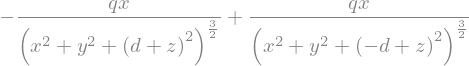

In [5]:
# Calculemos las componentes del campo eléctrico. Comenzamos por E_x = -d phi/dx:
E_x = -diff(phi, x)
E_x

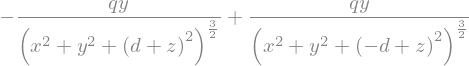

In [6]:
# E_y = -d phi/dy:
E_y = -diff(phi, y)
E_y

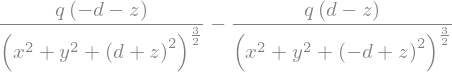

In [7]:
# E_z = -d phi/dz:
E_z = -diff(phi, z)
E_z

## Potencial electrostático y campo eléctrico en el plano y=0
Ahora usamos NumPy y Matplotlib para graficar estos resultados. SimPy tiene la función "lambdify" (https://docs.sympy.org/latest/modules/utilities/lambdify.html) que permite convertir expresiones simbólicas en funciones numéricas para NumPy. Usamos lambdify para generar rápidamente expresiones para las cantidades de interés que queremos graficar, reemplazando antes y=0, y dejando a la carga q y a la distancia d al plano como variables.

In [8]:
sigma     = lambdify([x,y,q,d],sigma)
potential = lambdify([z,x,q,d],phi.subs(y,0))
ez        = lambdify([z,x,q,d],E_z.subs(y,0))
ex        = lambdify([z,x,q,d],E_x.subs(y,0))

In [9]:
# Importamos NumPy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Definimos valores para la carga y la distancia de la carga al plano conductor
char = 1. # carga (en unidades adimensionales)
dist = 5. # distancia de la carga al plano (prueben cambiar estos valores)

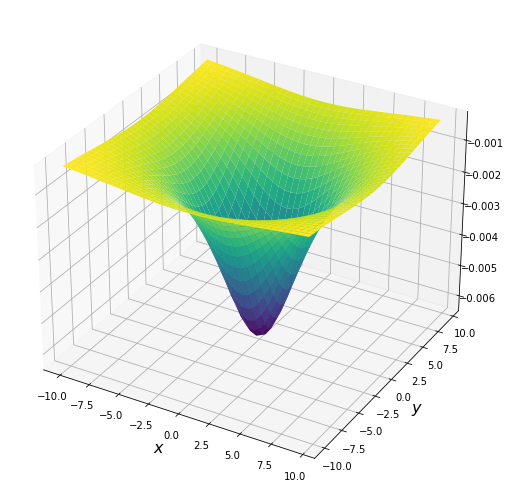

In [11]:
# Graficamos la densidad superficial de carga
x = np.arange(-10,10,.5)
y = np.arange(-10,10,.5)
xmesh,ymesh = np.meshgrid(x,y)

fig = plt.figure(figsize=(7,7))
ax  = fig.gca(projection='3d')
ax.plot_surface(xmesh,ymesh,sigma(xmesh,ymesh,char,dist),cmap='viridis')
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$y$',fontsize=16)
plt.tight_layout()
plt.show()

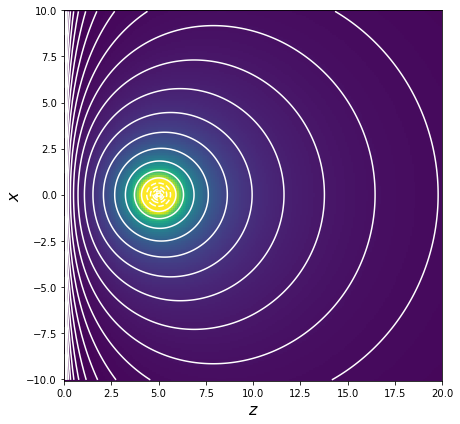

In [12]:
# Graficamos el valor del potencial y las curvas equipotenciales en el plano (x,z)
z = np.arange(  0.05,20.05,.1) # Desplazamos la malla en 0.05 para evitar la singularidad en la posición de la carga
x = np.arange(-10.05,10.05,.1)
zmesh,xmesh = np.meshgrid(z,x)

plt.figure(figsize=(6.5,6))
plt.pcolormesh(zmesh,xmesh,potential(zmesh,xmesh,char,dist),vmin=0,vmax=char,shading='auto')
plt.contour(z,x,-np.log(potential(zmesh,xmesh,char,dist)),colors=['white'],levels=30)
plt.xlabel(r'$z$',fontsize=16)
plt.ylabel(r'$x$',fontsize=16)
plt.tight_layout()
plt.show()

<string>:2: RuntimeWarning: invalid value encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide


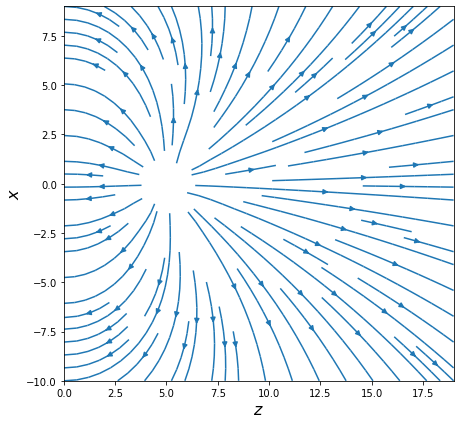

In [13]:
# Graficamos el campo eléctrico
z = np.arange(  0,20,1)
x = np.arange(-10,10,1)
zmesh,xmesh = np.meshgrid(z,x)

plt.figure(figsize=(6.5,6))
plt.streamplot(zmesh,xmesh,ez(zmesh,xmesh,char,dist),ex(zmesh,xmesh,char,dist),)
plt.xlabel(r'$z$',fontsize=16)
plt.ylabel(r'$x$',fontsize=16)
plt.tight_layout()
plt.show()

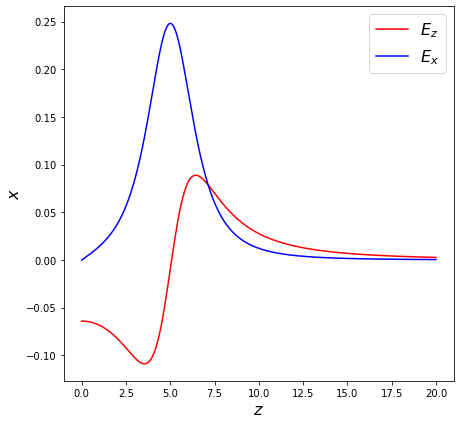

In [14]:
# Veamos finalmente lo que ocurre en el salto en la interfaz
z = np.arange(-0.005,20.005,.01)
x = 2.

plt.figure(figsize=(6.5,6))
plt.plot(z,ez(z,x,char,dist),'r',label=r'$E_z$')
plt.plot(z,ex(z,x,char,dist),'b',label=r'$E_x$')
plt.legend(fontsize=16)
plt.xlabel(r'$z$',fontsize=16)
plt.ylabel(r'$x$',fontsize=16)
plt.tight_layout()
plt.show()